In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

## Classification Logistic Regression

In [2]:
# Get the data straight from the link.
df = pd.read_csv('https://raw.githubusercontent.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt', header=None)
df.columns = ['Exam1', 'Exam2', 'Accepted']
df.head()

,Exam1,Exam2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
df.describe()

,Exam1,Exam2,Accepted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


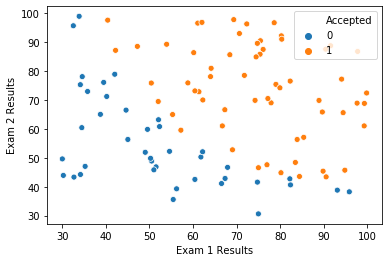

In [4]:
sns.scatterplot(x=df["Exam1"], y=df["Exam2"], hue=df["Accepted"])
plt.xlabel('Exam 1 Results')
plt.ylabel('Exam 2 Results')
plt.show()

In [5]:
y = df['Accepted']
x = df[['Exam1', 'Exam2']]
x = sm.add_constant(x)
model = sm.Logit(y, x).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               Accepted   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Mon, 02 Dec 2019   Pseudo R-squ.:                  0.6976
Time:                        17:25:22   Log-Likelihood:                -20.350
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                 4.067e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.1613      5.799     -4.339      0.000     -36.526     -13.796
Exam1          0.2062      0.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


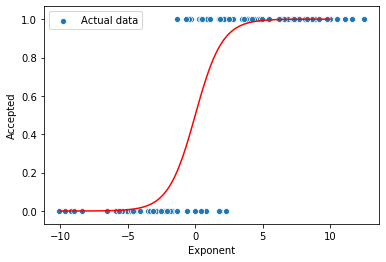

In [7]:
sns.scatterplot(x=df["exponent"], y=df["Accepted"], label='Actual data')
plt.xlabel('Exponent')
plt.ylabel('Accepted')
plt.plot(xline, yline, 'r', label='Logistic Function')
plt.show()

In [8]:
pred = np.array(model.predict(x) > 0.5, dtype=float)
actual = np.array(y)

In [9]:
pred = np.array(model.predict(x) > 0.5, dtype=float)
actual = np.array(y)

tp = np.sum(np.logical_and(actual==1, pred==1))
tn = np.sum(np.logical_and(actual==0, pred==0))
fp = np.sum(np.logical_and(actual==0, pred==1))
fn = np.sum(np.logical_and(actual==1, pred==0))

print("True positives (Actual = 1 and predicted = 1): ", tp)
print("True negatives (Actual = 0 and predicted = 0): ", tn)
print("False positives (Actual = 0 and predicted = 1): ", fp)
print("False negatives (Actual = 1 and predicted = 0): ", fn)

True positives (Actual = 1 and predicted = 1):  55
True negatives (Actual = 0 and predicted = 0):  34
False positives (Actual = 0 and predicted = 1):  6
False negatives (Actual = 1 and predicted = 0):  5


In [10]:
# Now calculate the accuracy, the precision and the sensitivity

print("Accuracy (tp + tn)/(tp + tn + fn + fp): ", (tp + tn)/(tp + tn + fn + fp))
print("Precision tp/(tp + fp): ", tp/(tp + fp))
print("Sensitivity tp/(tp + fn): ", tp/(tp + fn))

Accuracy (tp + tn)/(tp + tn + fn + fp):  0.89
Precision tp/(tp + fp):  0.9016393442622951
Sensitivity tp/(tp + fn):  0.9166666666666666


## Only using Exam1 as an independent variable

In [11]:
# Accepted probability as a logistic function of Exam1

y = df['Accepted']
x = df[['Exam1']]
x = sm.add_constant(x)
model = sm.Logit(y, x).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.485011
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Accepted   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Dec 2019   Pseudo R-squ.:                  0.2793
Time:                        17:25:23   Log-Likelihood:                -48.501
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                 8.684e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7182      1.047     -4.506      0.000      -6.770      -2.666
Exam1          0.0809      0.

In [12]:
pred = np.array(model.predict(x) > 0.75, dtype=float)
actual = np.array(y)

tp = np.sum(np.logical_and(actual==1, pred==1))
tn = np.sum(np.logical_and(actual==0, pred==0))
fp = np.sum(np.logical_and(actual==0, pred==1))
fn = np.sum(np.logical_and(actual==1, pred==0))

print("True positives (Actual = 1 and predicted = 1): ", tp)
print("True negatives (Actual = 0 and predicted = 0): ", tn)
print("False positives (Actual = 0 and predicted = 1): ", fp)
print("False negatives (Actual = 1 and predicted = 0): ", fn)

True positives (Actual = 1 and predicted = 1):  36
True negatives (Actual = 0 and predicted = 0):  34
False positives (Actual = 0 and predicted = 1):  6
False negatives (Actual = 1 and predicted = 0):  24


In [13]:
# Now calculate the accuracy, the precision and the sensitivity

print("Accuracy (tp + tn)/(tp + tn + fn + fp): ", (tp + tn)/(tp + tn + fn + fp))
print("Precision tp/(tp + fp): ", tp/(tp + fp))
print("Sensitivity tp/(tp + fn): ", tp/(tp + fn))

Accuracy (tp + tn)/(tp + tn + fn + fp):  0.7
Precision tp/(tp + fp):  0.8571428571428571
Sensitivity tp/(tp + fn):  0.6


In [14]:
# How would the results change if the acceptance threshold is 0.75?



In [15]:
df['exponent'] = -4.7182 + df['Exam1']*0.0809
xline = np.linspace(-3, 3, 100)
yline = 1/(1 + np.exp(-xline))

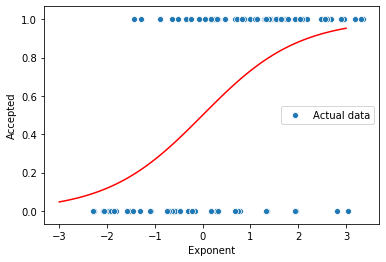

In [16]:
sns.scatterplot(x=df["exponent"], y=df["Accepted"], label='Actual data')
plt.xlabel('Exponent')
plt.ylabel('Accepted')
plt.plot(xline, yline, 'r', label='Logistic Function')
plt.show()